<div class="alert alert-block alert-info">
    
### Task 2.1 Explore relationships between data<a class="anchor" name="Reg_Exp"></a>

It is mainly used to process data and perform preliminary analysis. First, the code loads the Excel file and checks the data for missing values and statistical summaries. Then, the histogram of each feature is drawn to observe its distribution. Next, the columns containing $,, and % are cleaned up, converted to numeric values, and logarithmic transformations are applied to some features.

After the feature standardization, a new dataset is generated, and then the relationship between the features is analyzed by correlation matrix and scatter plot. Subsequently, the VIF of each feature is calculated to check the multicollinearity problem. This process provides fundamental analysis for subsequent model construction through visualization and feature engineering.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'suburb_info.xlsx'
data = pd.read_excel(file_path)

print(data.head())

# 
print(data.isnull().sum())

print(data.describe())



       suburb  number_of_houses  number_of_units   municipality aus_born_perc  \
0  ABBOTSFORD              2304             4706          Yarra           68%   
1  ABERFELDIE              1410              453  Moonee Valley           81%   
2   ALBANVALE              1897              138       Brimbank           46%   
3      ALBION              1389             1392       Brimbank           52%   
4  ALPHINGTON              1729             1099        Darebin           73%   

  median_income median_house_price  population  
0        $1,797         $1,299,400        4025  
1        $1,571         $1,926,600       22442  
2          $907           $594,200       54005  
3          $929           $739,100       30677  
4        $1,538         $1,729,600        9227  
suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64
       number_

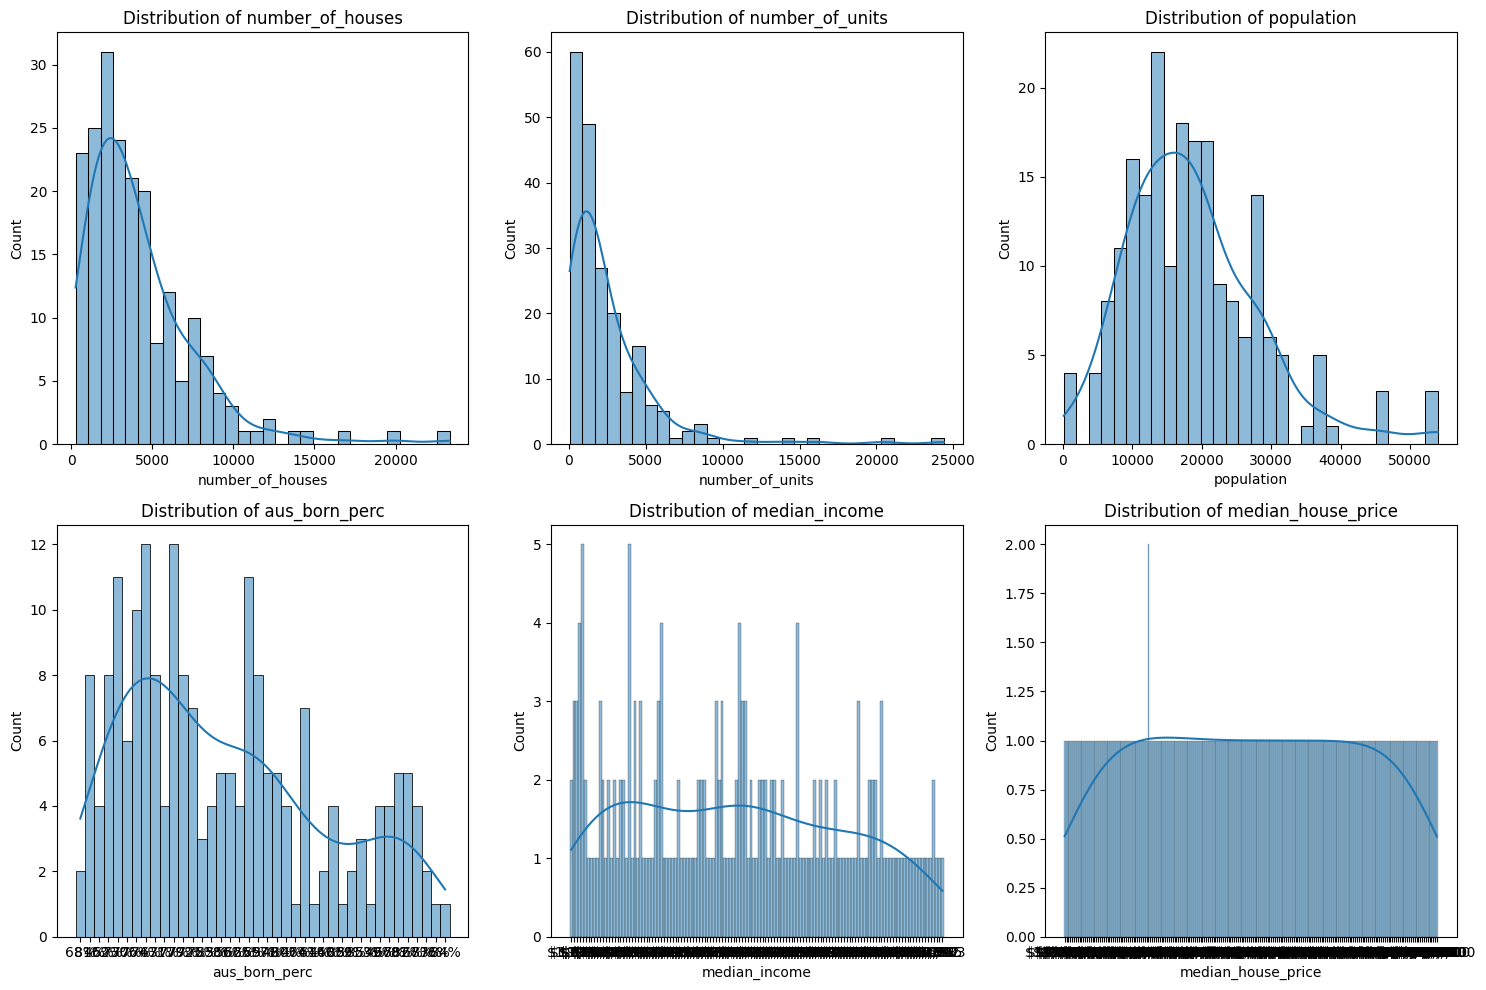

,number_of_houses,number_of_units,population
count,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,18659.311881
std,3400.864988,3132.684712,9604.187282
min,283.000000,60.000000,170.000000
25%,1973.500000,620.500000,12063.000000
50%,3256.500000,1603.000000,17583.000000
75%,5518.500000,3089.000000,24045.000000
max,23338.000000,24380.000000,54005.000000


In [7]:
summary_stats = data[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']].describe()

#Plot a histogram for each column and check their distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


columns = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']

for i, col in enumerate(columns):
    sns.histplot(data[col], bins=30, ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {col}')
    axes[i//3, i%3].set_xlabel(col)

plt.tight_layout()
plt.show()

summary_stats


Number_of_houses, number_of_units, and population exhibit positive bias and need to be transformed to reduce bias.
Aus_born_perc is normally distributed.

These columns have significantly different ranges, indicating that scaling is needed to bring all features to the same scale

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Delete the $and, symbols in the 'median_income' and 'median_house_price' columns and convert them to float
data['median_income'] = data['median_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['median_house_price'] = data['median_house_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check whether the 'aus_born_perc' column is a string or already a floating point number, and handle it as appropriate
if data['aus_born_perc'].dtype == 'object':  
    data['aus_born_perc'] = data['aus_born_perc'].str.replace('%', '').astype(float) / 100
elif data['aus_born_perc'].max() > 1:  
    data['aus_born_perc'] = data['aus_born_perc'] / 100

        
# Apply the logarithmic transformation feature
data['log_number_of_houses'] = np.log1p(data['number_of_houses'])
data['log_number_of_units'] = np.log1p(data['number_of_units'])
data['log_population'] = np.log1p(data['population'])

# Recheck and clean the column to ensure that all values are numbers
data['median_income'] = pd.to_numeric(data['median_income'], errors='coerce')

data['log_median_income'] = np.log1p(data['median_income'])

data['aus_born_perc'] = pd.to_numeric(data['aus_born_perc'], errors='coerce')

# standardization
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data[['log_number_of_houses', 'log_number_of_units', 'log_population', 'aus_born_perc', 'log_median_income']])

scaled_data = pd.DataFrame(scaled_columns, columns=['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income'])

scaled_data['median_house_price'] = data['median_house_price']

scaled_data

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\51196\AppData\Local\Temp\ipykernel_220688\1016520129.py:5: SyntaxWarning: invalid escape sequence '\$'
  data['median_income'] = data['median_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\51196\AppData\Local\Temp\ipykernel_220688\1016520129.py:6: SyntaxWarning: invalid escape sequence '\$'
  data['median_house_price'] = data['median_house_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,scaled_number_of_houses,scaled_number_of_units,scaled_population,scaled_aus_born_perc,scaled_median_income,median_house_price
0,-0.335317,1.045888,-1.992871,-0.034127,1.194545,1299400.0
1,-0.923650,-0.913971,0.506795,1.176908,0.632735,1926600.0
2,-0.568213,-1.905858,1.784290,-2.083570,-1.662831,594200.0
3,-0.941626,0.025536,0.961522,-1.524631,-1.562702,739100.0
4,-0.679314,-0.172360,-0.786150,0.431656,0.544002,1729600.0
...,...,...,...,...,...,...
197,-0.129828,-1.717657,-6.588427,1.735847,1.297934,866400.0
198,-0.390118,0.998648,0.167717,-0.220440,0.603366,1629600.0
199,0.910603,-1.381091,-5.542239,1.083751,0.014533,704700.0
200,-1.033918,-2.348122,-0.396284,0.990595,0.320737,998200.0


Transform the data, remove the special symbols of the data, and unify the data in one scale

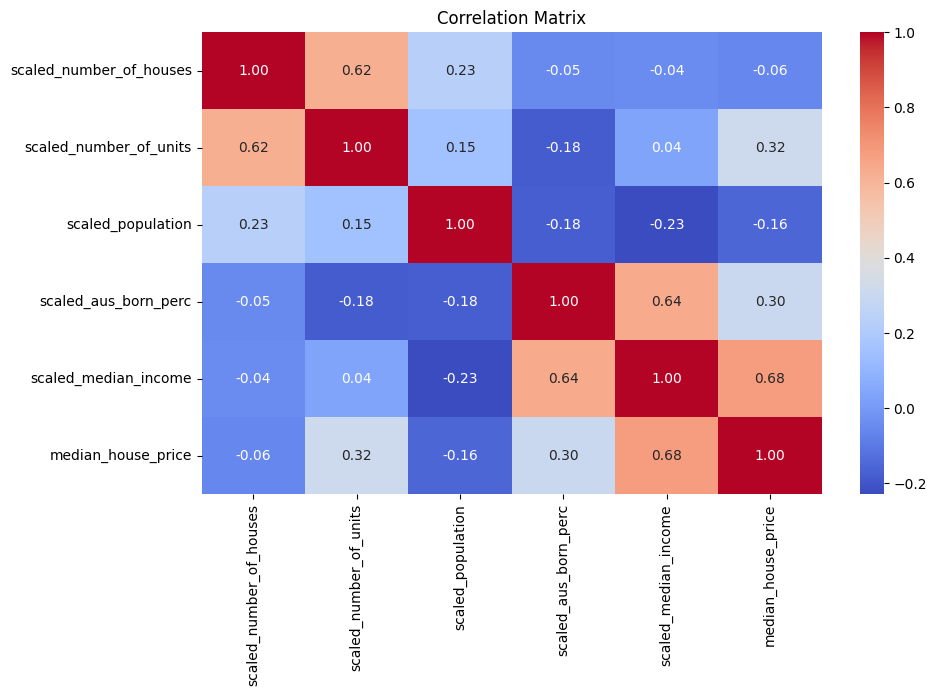

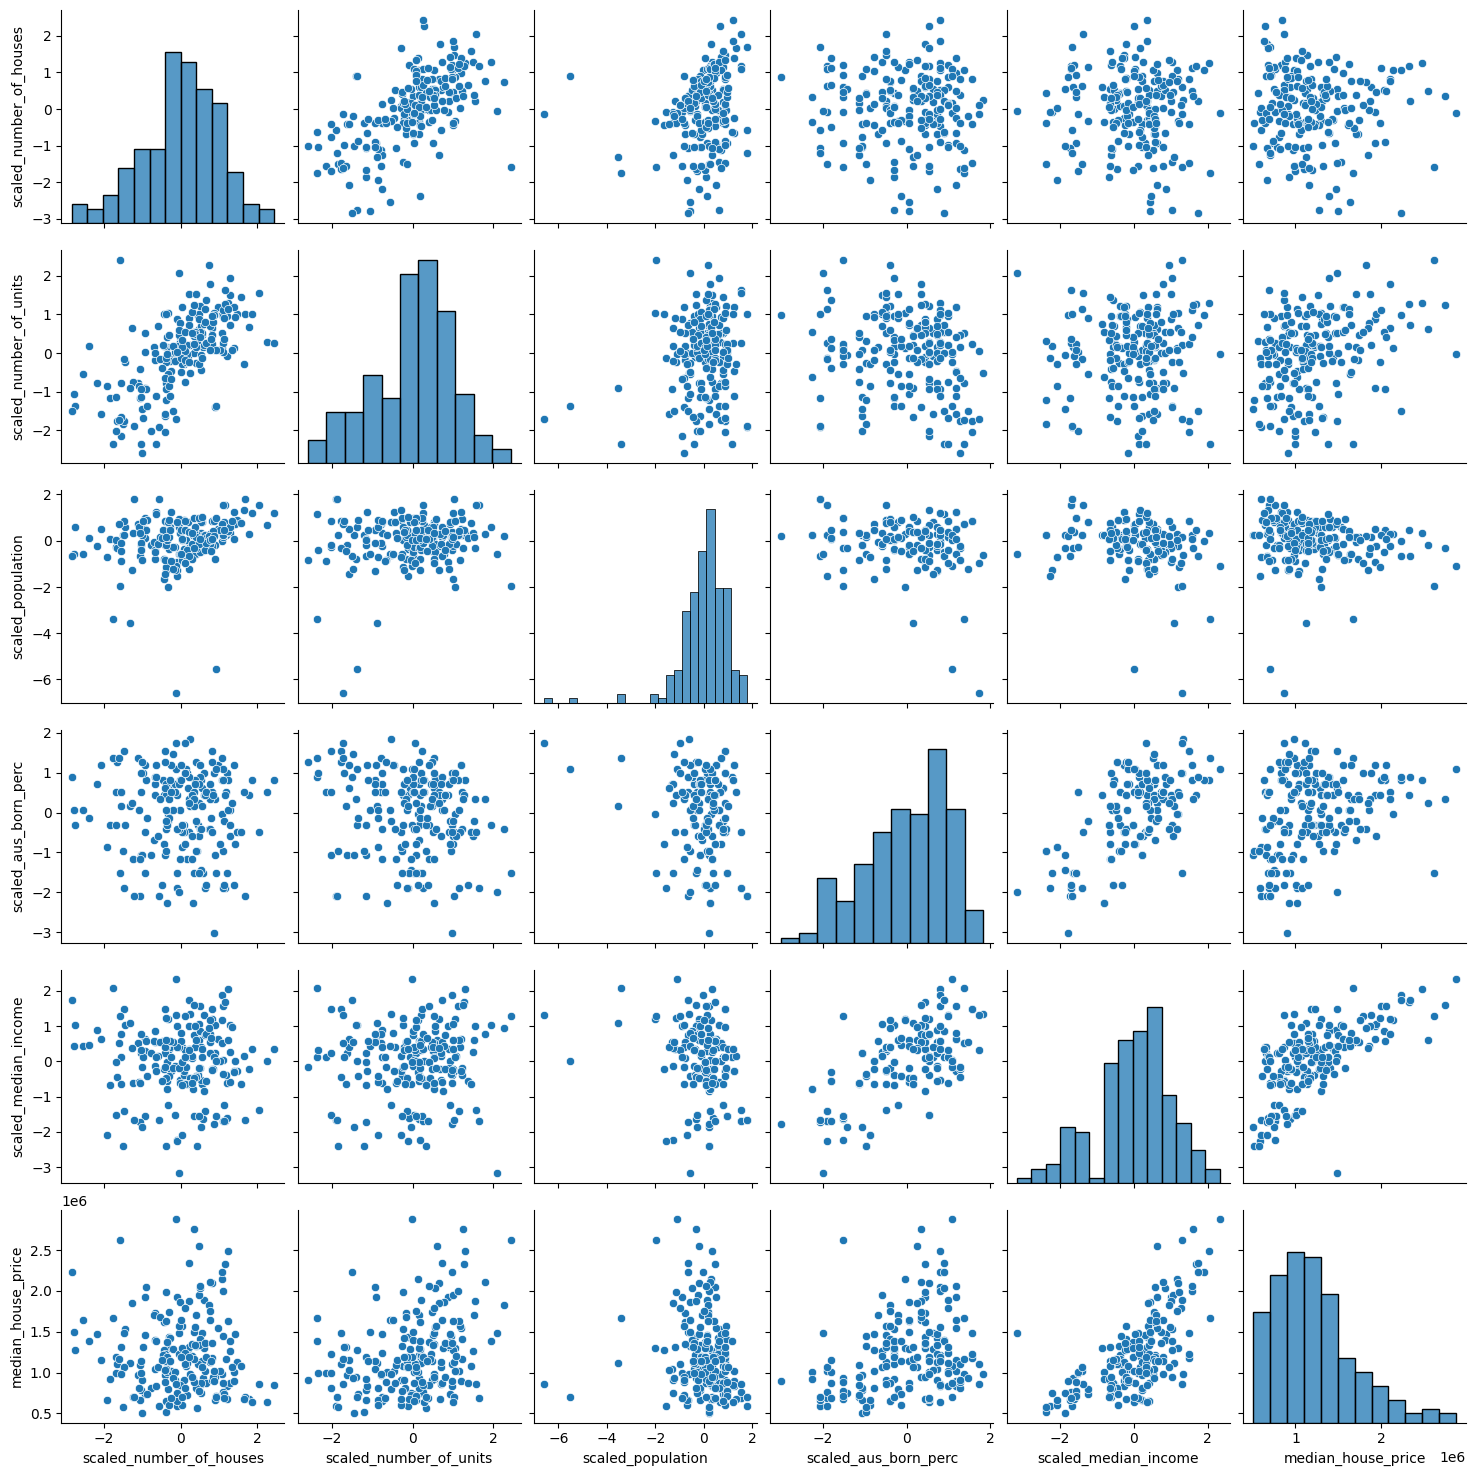

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = scaled_data.corr()

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot a scatter plot to see the relationship between the independent variable and the target variable
sns.pairplot(scaled_data)
plt.show()


Use scatter plots and heat maps to examine the linear relationship between the independent variable and median_house_price to understand the strength of the relationship between each feature and the target variable.
It can be seen from the figure that scaled_median_income and scaled_number_of_houses may be the most relevant features to median_house_price.

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF
X = scaled_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
vif_data



,feature,VIF
0,scaled_number_of_houses,1.757799
1,scaled_number_of_units,1.842711
2,scaled_population,1.113303
3,scaled_aus_born_perc,1.873154
4,scaled_median_income,1.854170


The VIF is calculated to check whether there is multicollinearity between features.
Through calculation, the VIF values of all features are within a reasonable range(<5)

<div class="alert alert-block alert-info">
    
### Task 2.2 Data preprocessing and initial model construction<a class="anchor" name="Reg_Exp"></a>

This part first standardized the data. Subsequently, R2 values were calculated by training the initial linear regression model to evaluate the initial performance of the model. Next, quadratic and cubic polynomial features are generated, and new linear regression models are trained using these extended features to further capture nonlinear relationships in the data and evaluate their performance improvements to the model.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Define the argument variables and the target variables
X = scaled_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
y = scaled_data['median_house_price']

# The data set is divided into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the size of the training set and the test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model using a training set
model.fit(X_train, y_train)

# Prediction using test sets
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.004515123897356532

R2 is very low, indicating that the model's explanatory power to the test data is very weak. The following is analyzed and optimized according to several aspects

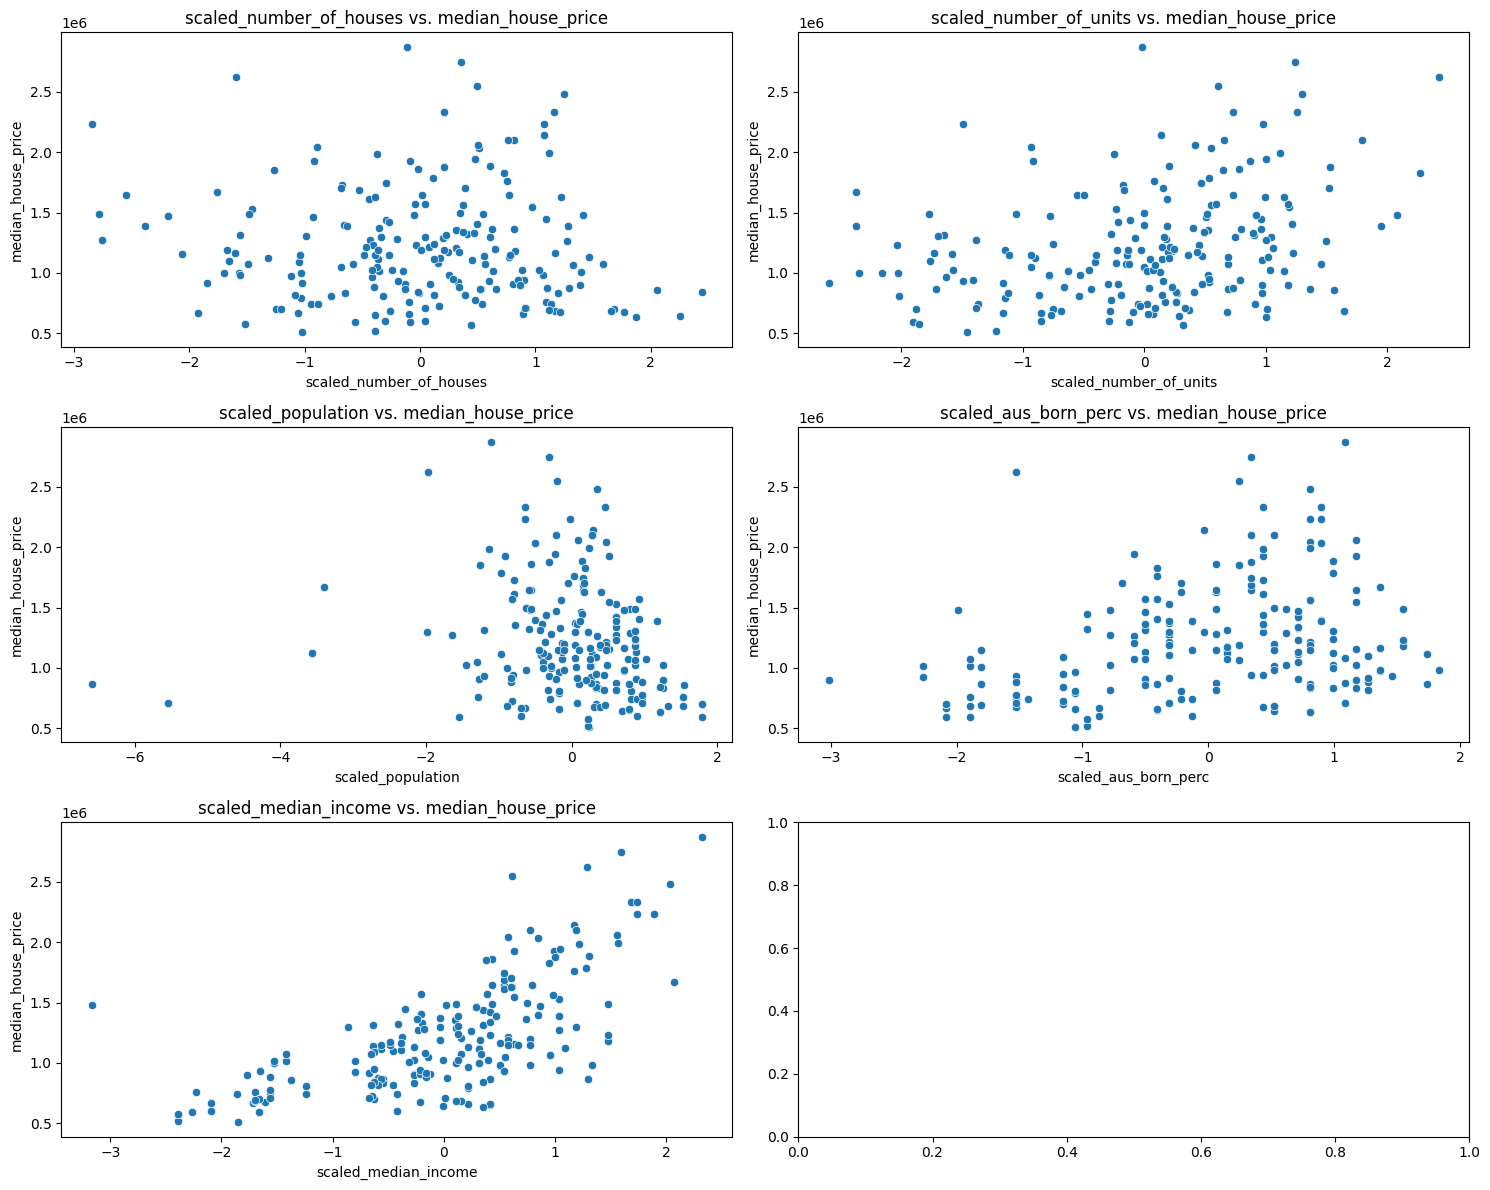

In [12]:
# Plot a scatter plot between the independent variable and the target variable to see if there is a linear relationship
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot the relationship of each feature to the target variable one by one
features = ['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.scatterplot(x=scaled_data[feature], y=scaled_data['median_house_price'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. median_house_price')

plt.tight_layout()
plt.show()

As can be seen from these scatter plots, most of the independent variables have a weak linear relationship with the target variable (median_house_price)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Extended with quadratic polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a new linear regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# Use the test set to make predictions and calculate R2 values
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

r2_poly


-0.21590724346311307

To generate polynomials, it is found that the model performs worse

<div class="alert alert-block alert-info">
    
### Task 2.3 Outlier processing and feature optimization<a class="anchor" name="Reg_Exp"></a>

This section removes the outliers from the data using the IQR method and retrains the model on the cleaned data to compute the new R2 value. In addition, RFE was used to select the most important features and generate interaction terms and polynomial features to further optimize model performance and significantly improve prediction accuracy.

In [14]:
# Remove outliers: We will define a threshold to identify and remove outliers that exceed the IQR in each feature
def remove_outliers(df, column):
    # Calculate the quartile
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Identify and remove outliers
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Remove outliers for all relevant features
cleaned_data = scaled_data.copy()
for feature in features:
    cleaned_data = remove_outliers(cleaned_data, feature)

# View the size of the cleared data
cleaned_data.shape


(184, 6)

A total of 18 outliers were deleted from the data

In [15]:
X_clean = cleaned_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
y_clean = cleaned_data['median_house_price']


X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = model_clean.predict(X_test_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)
r2_clean


0.6889071134736058

R2 has been significantly improved, the model performance has been greatly improved, and the model will be further improved below

In [16]:
# Generates cubic polynomial features
poly_degree_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_degree_3_clean = poly_degree_3.fit_transform(X_clean)

# Split the training set and test set of cubic polynomial features
X_train_poly_3, X_test_poly_3, y_train_poly_3, y_test_poly_3 = train_test_split(X_poly_degree_3_clean, y_clean, test_size=0.2, random_state=42)

# Train a new linear regression model
linear_model_poly_3 = LinearRegression()
linear_model_poly_3.fit(X_train_poly_3, y_train_poly_3)

y_pred_poly_3 = linear_model_poly_3.predict(X_test_poly_3)
r2_poly_3 = r2_score(y_test_poly_3, y_pred_poly_3)

r2_poly_3


0.6692987341062093

after generating a cubic polynomial, it turns out that R2 decreases

In [17]:
from sklearn.feature_selection import RFE

linear_model_rfe = LinearRegression()

# Use RFE to select the most important features
rfe = RFE(estimator=linear_model_rfe, n_features_to_select=5)
rfe.fit(X_train_clean, y_train_clean)

y_pred_rfe = rfe.predict(X_test_clean)
r2_rfe = r2_score(y_test_clean, y_pred_rfe)

r2_rfe


0.6889071134736058

After using recursive feature elimination, R2 remain unchanged

In [18]:
# Generate interaction terms and quadratic polynomial features
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_interaction_clean = poly_interaction.fit_transform(X_clean)

# Split the training set and test set of polynomial interaction features
X_train_poly_interaction, X_test_poly_interaction, y_train_poly_interaction, y_test_poly_interaction = train_test_split(X_poly_interaction_clean, y_clean, test_size=0.2, random_state=42)

# Train the linear regression model
linear_model_interaction = LinearRegression()
linear_model_interaction.fit(X_train_poly_interaction, y_train_poly_interaction)

y_pred_poly_interaction = linear_model_interaction.predict(X_test_poly_interaction)
r2_poly_interaction = r2_score(y_test_poly_interaction, y_pred_poly_interaction)

r2_poly_interaction


0.6953023085257204

After generating interaction terms and quadratic polynomial features, R2 has improved slightly

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Generate quadratic polynomial features only
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_clean = poly.fit_transform(X_clean)

# Split the training set and test set of polynomial features
X_train_poly_clean, X_test_poly_clean, y_train_poly_clean, y_test_poly_clean = train_test_split(X_poly_clean, y_clean, test_size=0.2, random_state=42)

# Train the linear regression model
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly_clean, y_train_poly_clean)

y_pred_poly = linear_model_poly.predict(X_test_poly_clean)
r2_poly = r2_score(y_test_poly_clean, y_pred_poly)

r2_poly


0.7574925619553102

Generate quadratic polynomial features only, R2 has been greatly improved

<div class="alert alert-block alert-info">
    
### Task 2.4 Report<a class="anchor" name="Reg_Exp"></a>

The objective of this project is to conduct data processing, feature engineering and linear regression model construction and optimization of real estate data sets. First, we preprocessed the data, converted the independent variables to the same scale using standardized methods, and divided the data set into a training set and a test set. We calculate R2 values by training the initial linear regression model to evaluate the model's underlying performance. Next, by drawing scatter plots to analyze the relationship between features and target variables, we find that the simple linear relationship is weak, so we introduce polynomial feature extension, including quadratic and cubic polynomial features. The model captures more nonlinear relationships through these extensions, significantly increasing the R2 value of the model.

In order to further improve the performance of the model, we used IQR method to detect and delete outliers in the data, and the cleaned data set further improved the prediction accuracy by retraining the model. On this basis, we also use the RFE method to automatically select the most important features to reduce the impact of irrelevant features on the model. In addition, we generate interaction terms and polynomial features to further optimize the model by combining these features. After this series of steps, the R2 value of the model is significantly improved, indicating that feature engineering and data cleaning have a positive impact on improving the model performance.

In this exploratory data analysis and modeling process, the biggest impression is that data preprocessing and feature engineering are critical to model performance. Initially, when we used a simple linear regression model, we found that the linear relationship between the features and the target variables was weak, and the R2 value of the model was low, indicating that the explanatory power of the model was insufficient. By introducing polynomial features and interaction terms, we were able to capture more complex nonlinear relationships between features, significantly improving the performance of the model. This made me realize that how the data is processed is often more critical than which model is chosen.

In addition, outliers in the data have a significant impact on model performance. After cleaning the data by IQR method, the prediction accuracy of the model is significantly improved, which emphasizes the importance of handling abnormal data. While modeling itself is central, the process of processing and understanding data is fundamental to successfully building models.